In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/superstore-sales/Superstore.csv
/kaggle/input/superstore-sales/Superstore.xlsx


In [2]:
#importing necessary libraries
import numpy as np
import re
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
superstore_data = pd.read_csv("/kaggle/input/superstore-sales/Superstore.csv", encoding="ISO-8859-1")

In [4]:
superstore_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# ****ANALYSIS****

In [5]:
superstore_data.columns
#loop to get the number of unique items in each column
for column in superstore_data.columns:
    print(column, ':', superstore_data[column].nunique())

Row ID : 9994
Order ID : 5009
Order Date : 1238
Ship Date : 1334
Ship Mode : 4
Customer ID : 793
Customer Name : 793
Segment : 3
Country : 1
City : 531
State : 49
Postal Code : 631
Region : 4
Product ID : 1862
Category : 3
Sub-Category : 17
Product Name : 1841
Sales : 5825
Quantity : 14
Discount : 12
Profit : 7287


In [6]:
#loop to get the unique items in each column
for column in superstore_data.columns:
    print(column, ':', superstore_data[column].unique())

Row ID : [   1    2    3 ... 9992 9993 9994]
Order ID : ['CA-2013-152156' 'CA-2013-138688' 'US-2012-108966' ... 'CA-2011-110422'
 'CA-2014-121258' 'CA-2014-119914']
Order Date : ['09-11-2013' '13-06-2013' '11-10-2012' ... '04-06-2013' '12-04-2012'
 '22-01-2011']
Ship Date : ['12-11-2013' '17-06-2013' '18-10-2012' ... '23-05-2012' '24-01-2011'
 '04-03-2014']
Ship Mode : ['Second Class' 'Standard Class' 'First Class' 'Same Day']
Customer ID : ['CG-12520' 'DV-13045' 'SO-20335' 'BH-11710' 'AA-10480' 'IM-15070'
 'HP-14815' 'PK-19075' 'AG-10270' 'ZD-21925' 'KB-16585' 'SF-20065'
 'EB-13870' 'EH-13945' 'TB-21520' 'MA-17560' 'GH-14485' 'SN-20710'
 'LC-16930' 'RA-19885' 'ES-14080' 'ON-18715' 'PO-18865' 'LH-16900'
 'DP-13000' 'JM-15265' 'TB-21055' 'KM-16720' 'PS-18970' 'BS-11590'
 'KD-16270' 'HM-14980' 'JE-15745' 'KB-16600' 'SC-20770' 'DN-13690'
 'JC-16105' 'CS-12400' 'PG-18895' 'GM-14455' 'JS-15685' 'KB-16315'
 'RB-19705' 'PN-18775' 'KD-16345' 'ER-13855' 'RB-19465' 'GZ-14470'
 'LC-16870' 'JM-152

In [7]:
superstore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

# ****DATA CLEANING****

In [8]:
#dropping unnecessary columns
superstore_data.drop(['Row ID', 'Order ID', 'Customer ID', 
                      'Product ID', 'Product Name', 'Customer Name',
                      'Postal Code', 'Country'], axis = 1, inplace = True)
#superstore_data.drop(['Country'], axis=1, inplace = True)
superstore_data.head()

,Order Date,Ship Date,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,09-11-2013,12-11-2013,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,09-11-2013,12-11-2013,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,13-06-2013,17-06-2013,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,11-10-2012,18-10-2012,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,11-10-2012,18-10-2012,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [9]:
#changing the dtype for some of the columns to the apppropriate ones
superstore_data["Order Date"] = pd.to_datetime(superstore_data["Order Date"])
superstore_data["Ship Date"] = pd.to_datetime(superstore_data["Ship Date"])
superstore_data.info()                                                             
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order Date    9994 non-null   datetime64[ns]
 1   Ship Date     9994 non-null   datetime64[ns]
 2   Ship Mode     9994 non-null   object        
 3   Segment       9994 non-null   object        
 4   City          9994 non-null   object        
 5   State         9994 non-null   object        
 6   Region        9994 non-null   object        
 7   Category      9994 non-null   object        
 8   Sub-Category  9994 non-null   object        
 9   Sales         9994 non-null   float64       
 10  Quantity      9994 non-null   int64         
 11  Discount      9994 non-null   float64       
 12  Profit        9994 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(7)
memory usage: 1015.1+ KB


/tmp/ipykernel_20/2182985592.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  superstore_data["Order Date"] = pd.to_datetime(superstore_data["Order Date"])
/tmp/ipykernel_20/2182985592.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  superstore_data["Ship Date"] = pd.to_datetime(superstore_data["Ship Date"])


In [10]:
superstore_data.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


# ****Data Visualization****

In [11]:
superstore_data.head()

,Order Date,Ship Date,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,2013-09-11,2013-12-11,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,2013-09-11,2013-12-11,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,2013-06-13,2013-06-17,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,2012-11-10,2012-10-18,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,2012-11-10,2012-10-18,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_20/2588568585.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout();


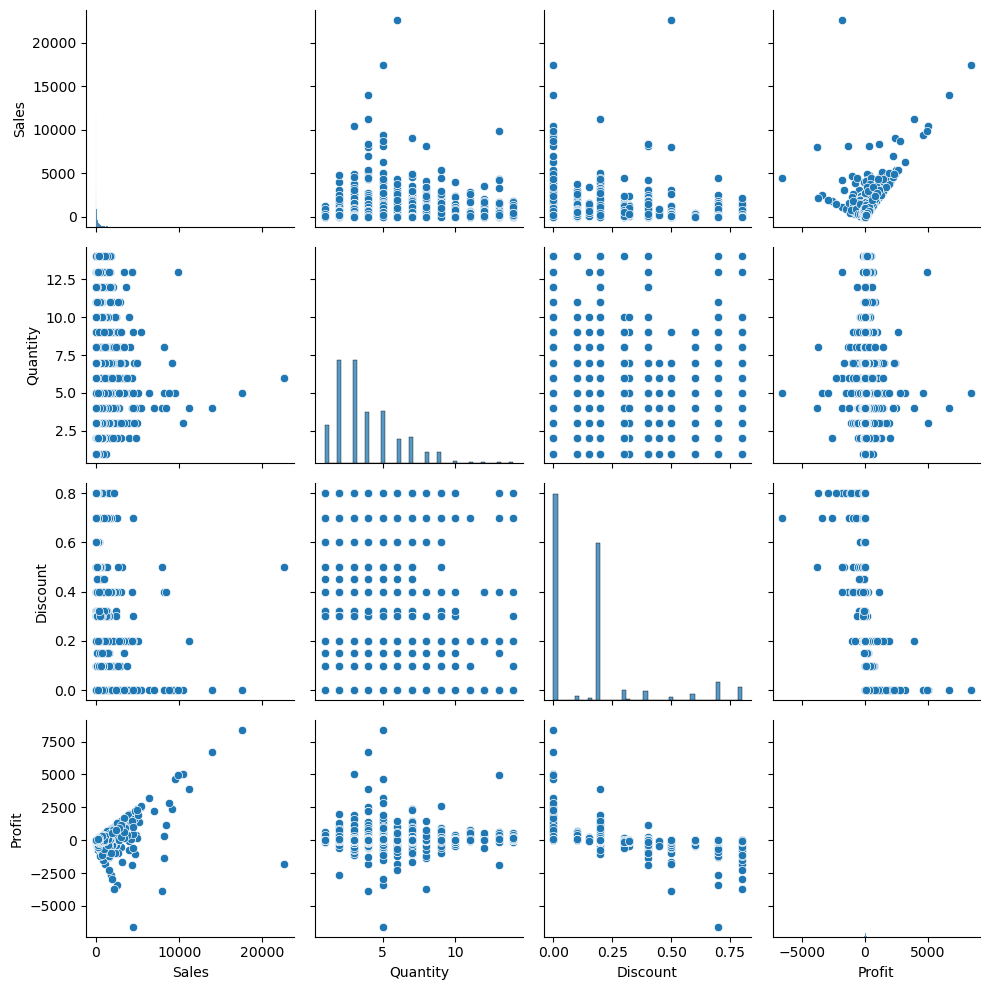

In [12]:
#visualization for the whole dataset
sns.pairplot(superstore_data)
plt.tight_layout();

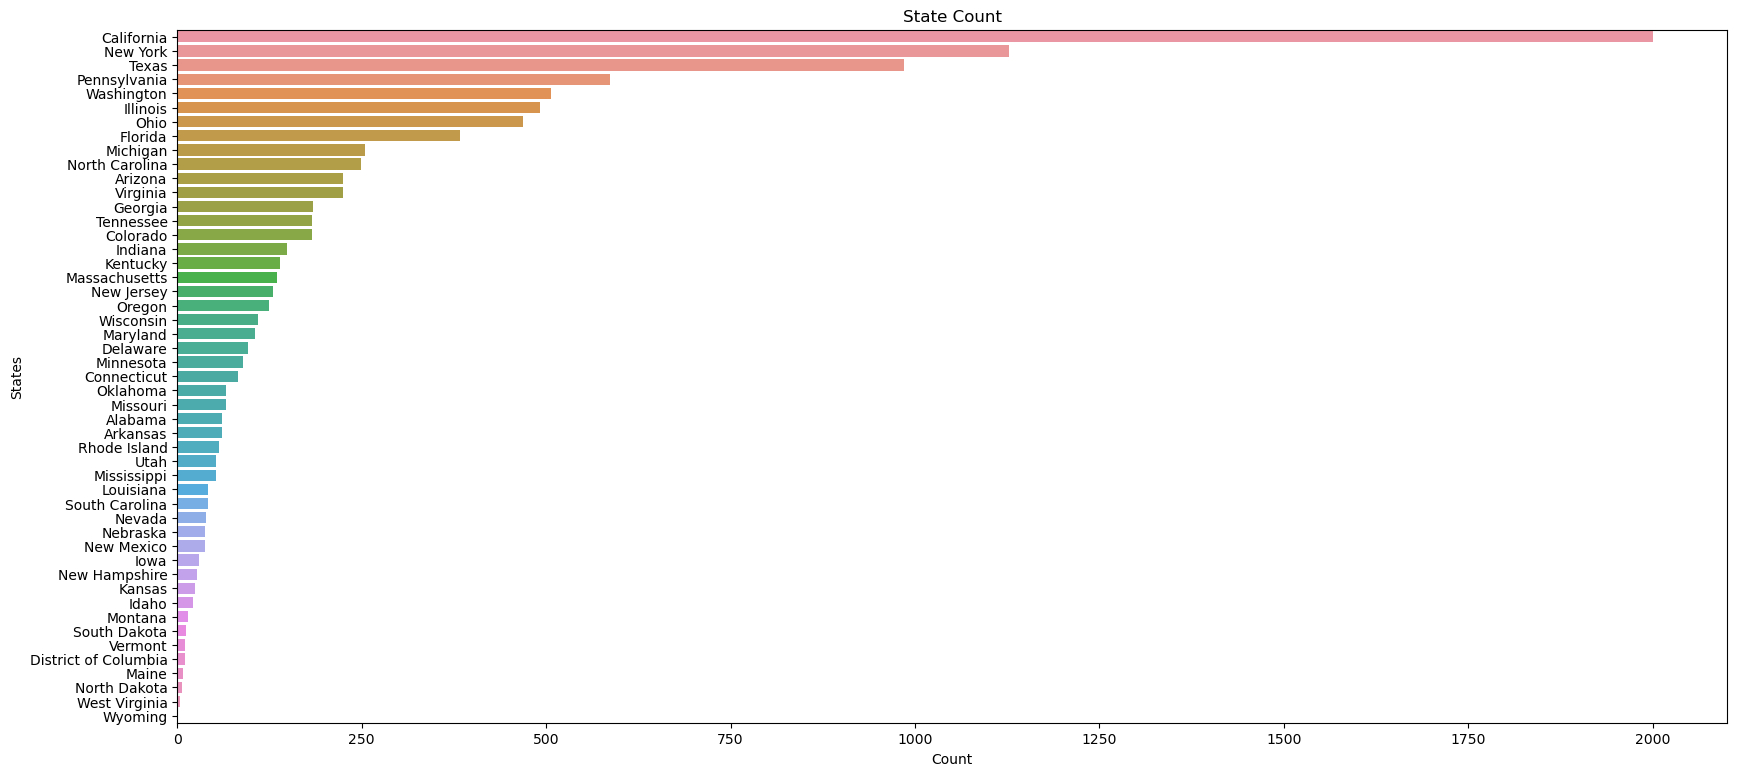

In [13]:
#starting with state visualization
state = superstore_data["State"].value_counts().to_frame().reset_index()
plt.figure(figsize = (20,9))
sns.barplot(y = state["index"], x = state["State"])
plt.ylabel("States")
plt.xlabel("Count")
plt.title("State Count");
#sns.barplot()

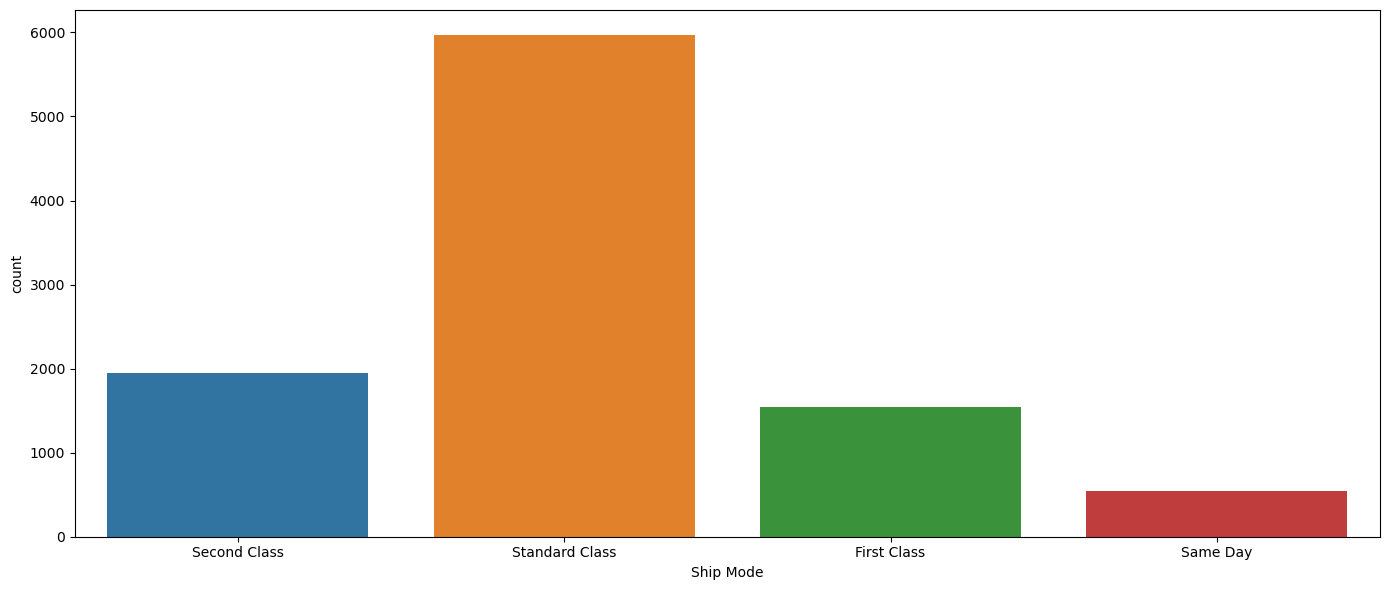

In [14]:
#visualizations with ship mode
plt.figure(figsize=(14,6))
sns.countplot(x=superstore_data["Ship Mode"])
plt.tight_layout()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x600 with 0 Axes>

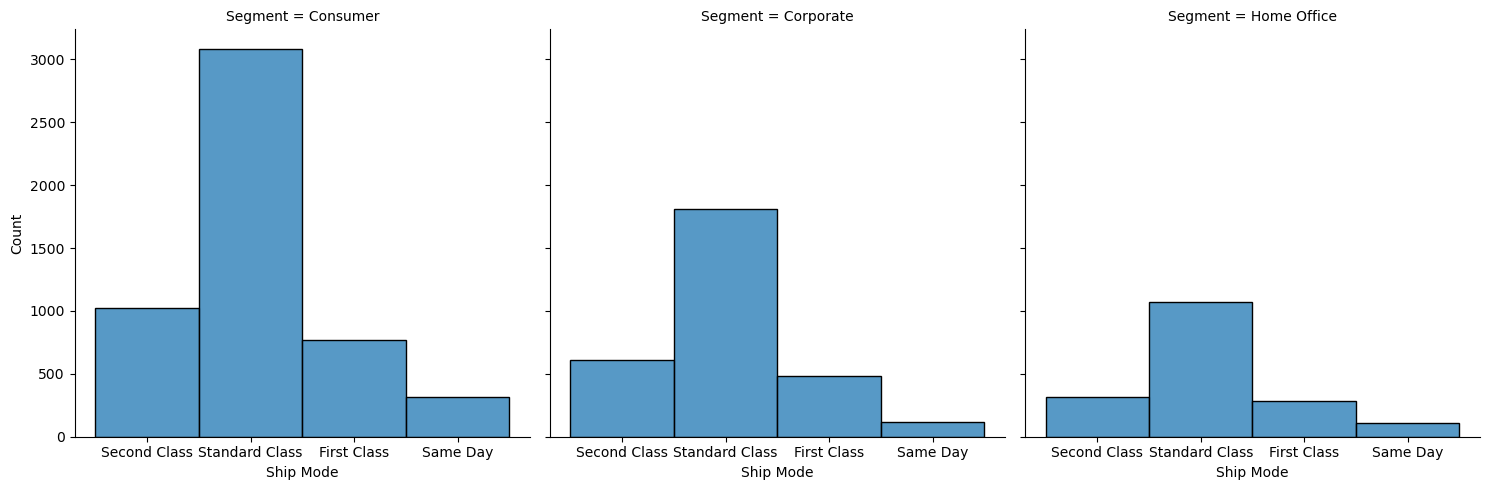

In [15]:
#ship mode by segment
plt.figure(figsize = (12,6))
sns.displot(superstore_data, x = "Ship Mode", col = "Segment");
#plt.xticks(rotation = 90);


In [16]:
#shipmode by profit
profit = superstore_data.groupby("Ship Mode")["Profit"].agg(["sum","mean"]).reset_index()

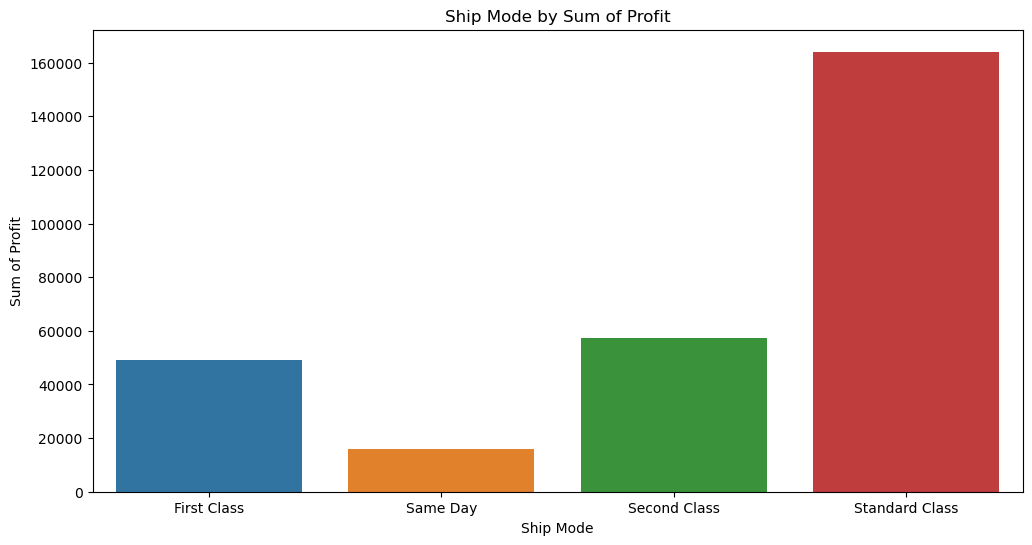

In [17]:
#shipmode by sum of profit
plt.figure(figsize = (12,6))
sns.barplot(x = profit["Ship Mode"], y = profit["sum"])
plt.xlabel("Ship Mode")
plt.ylabel("Sum of Profit")
plt.title("Ship Mode by Sum of Profit");

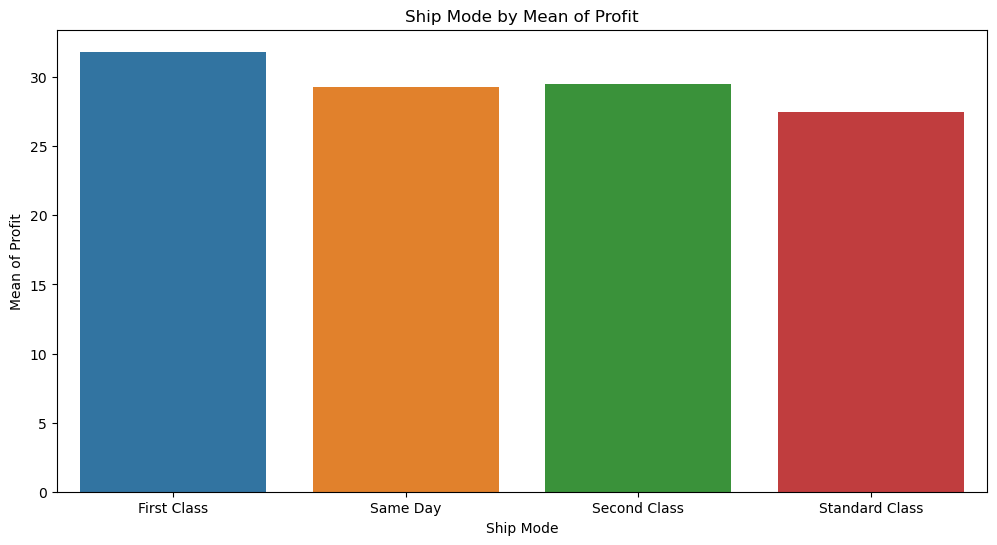

In [18]:
#shipmode by mean of profit
plt.figure(figsize = (12,6))
sns.barplot(x = profit["Ship Mode"], y = profit["mean"])
plt.xlabel("Ship Mode")
plt.ylabel("Mean of Profit")
plt.title("Ship Mode by Mean of Profit");

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x600 with 0 Axes>

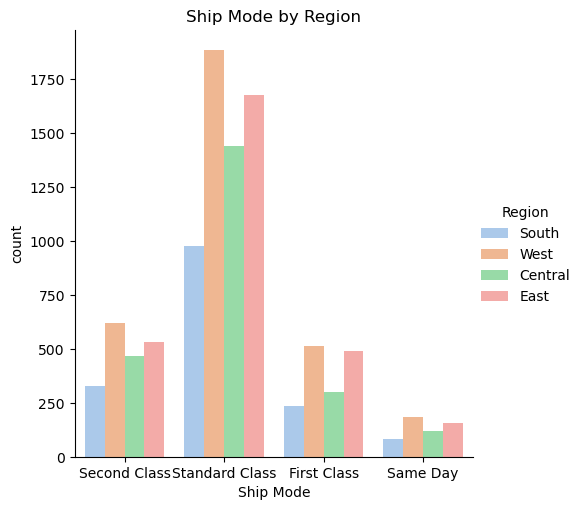

In [19]:
#ship mode by region
plt.figure(figsize = (12,6))
sns.catplot(data = superstore_data, x= "Ship Mode", hue = "Region", kind = "count", palette="pastel")
plt.title("Ship Mode by Region");

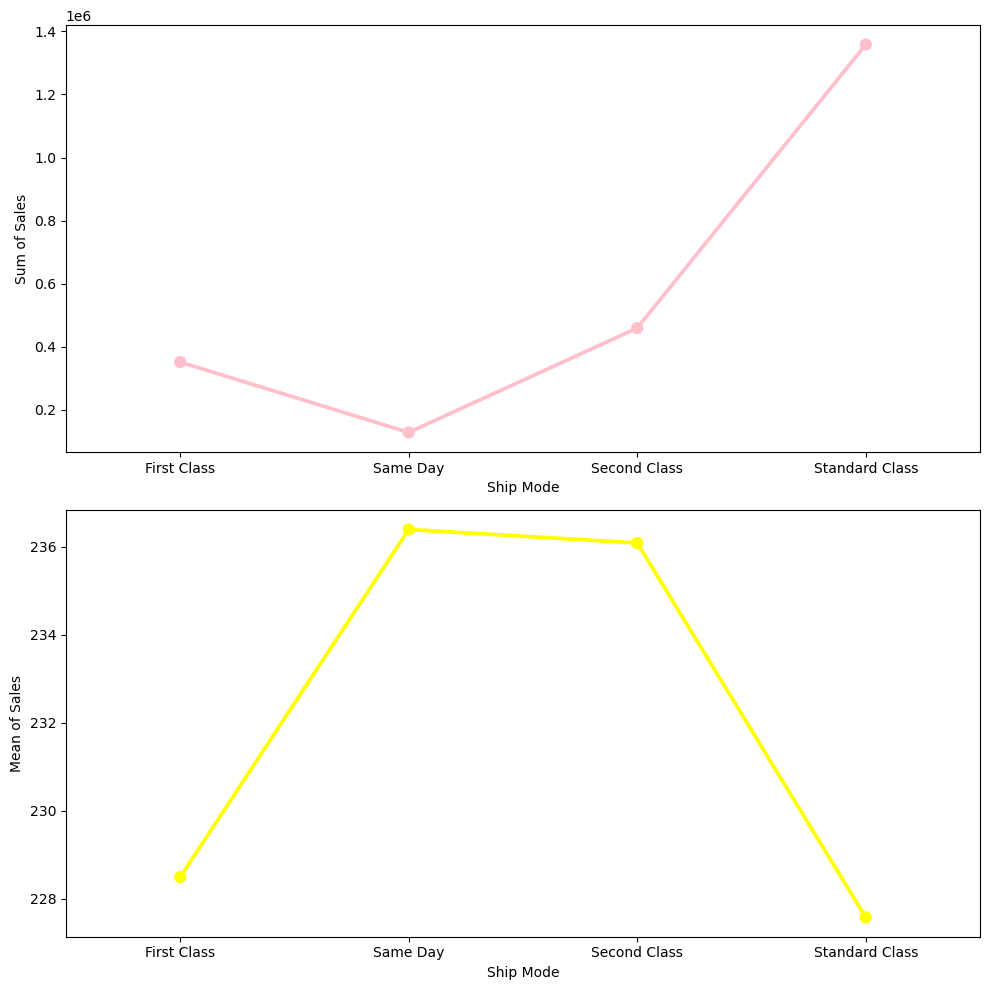

In [20]:
#ship mode by sales
sales = superstore_data.groupby("Ship Mode")["Sales"].agg(["sum", "mean"]).reset_index()
fig , ax = plt.subplots(2,1,figsize = (10,10))
ax_1 = sns.pointplot(y = sales["sum"], x = sales["Ship Mode"], ax=ax[0], color = "pink")
ax_1.set_ylabel("Sum of Sales")
ax_2 = sns.pointplot(y = sales["mean"], x = sales["Ship Mode"], ax=ax[1], color  = "yellow")
ax_2.set_ylabel("Mean of Sales")
plt.tight_layout()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x600 with 0 Axes>

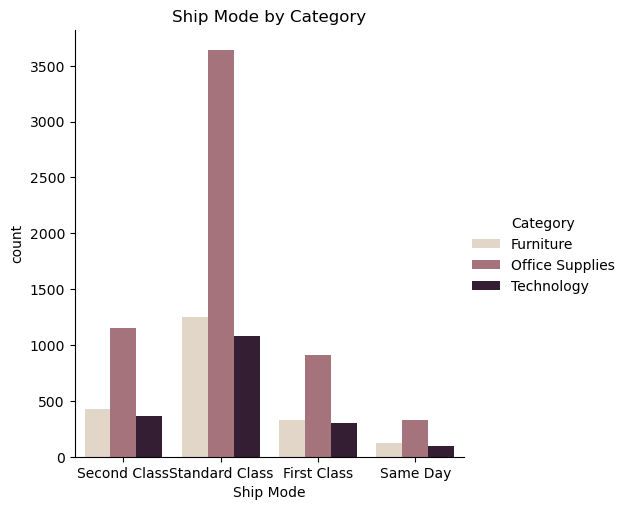

In [21]:
#ship mode by category
plt.figure(figsize = (12,6))
sns.catplot(data = superstore_data, x = "Ship Mode", hue = "Category", kind = "count", palette="ch:.25")
plt.title("Ship Mode by Category");

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_20/4169504407.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout();


<Figure size 1000x600 with 0 Axes>

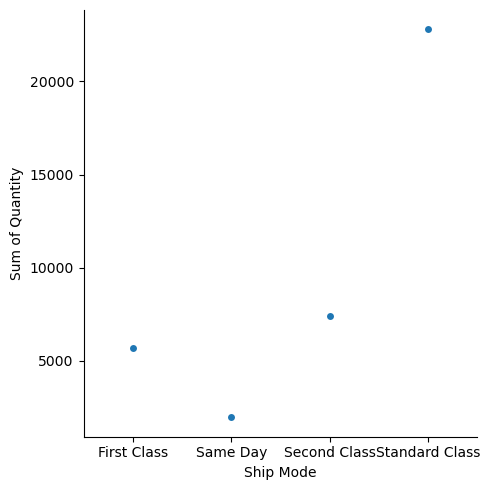

In [22]:
#ship mode by quantity
quantity = superstore_data.groupby("Ship Mode")["Quantity"].sum().to_frame()
quantity
plt.figure(figsize = (10,6))
sns.catplot(data = quantity, x= "Ship Mode", y = "Quantity", kind = "swarm")
plt.ylabel("Sum of Quantity")
plt.xlabel("Ship Mode")
plt.tight_layout();

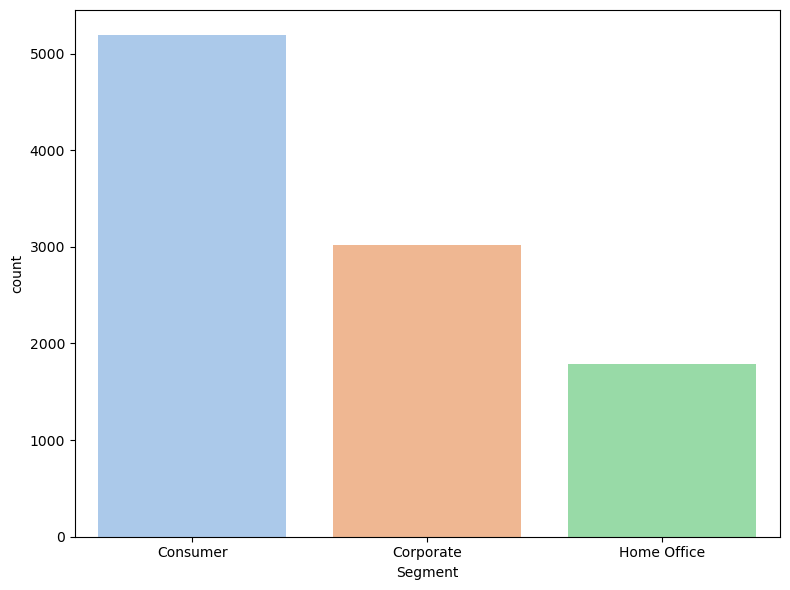

In [23]:
#segment
plt.figure(figsize = (8,6))
sns.countplot(x = superstore_data["Segment"], palette="pastel")
plt.tight_layout();

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_20/1646126337.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout();


<Figure size 1200x600 with 0 Axes>

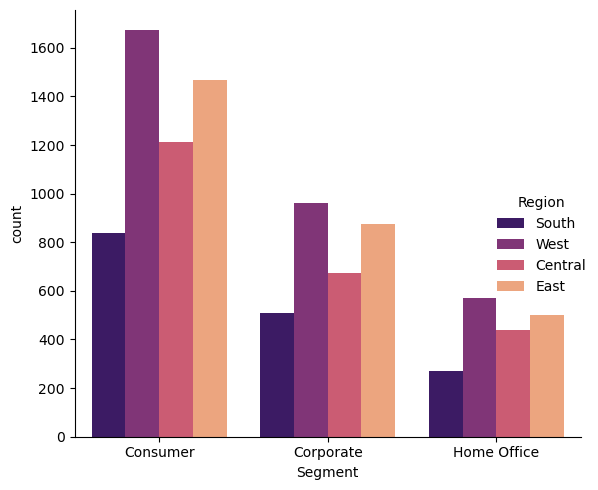

In [24]:
plt.figure(figsize = (12,6))
#color = sns.color_palette("crest", as_cmap=True)
sns.catplot(data = superstore_data, x = "Segment", hue = "Region", kind = "count", palette = "magma")
#sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True)
plt.tight_layout();

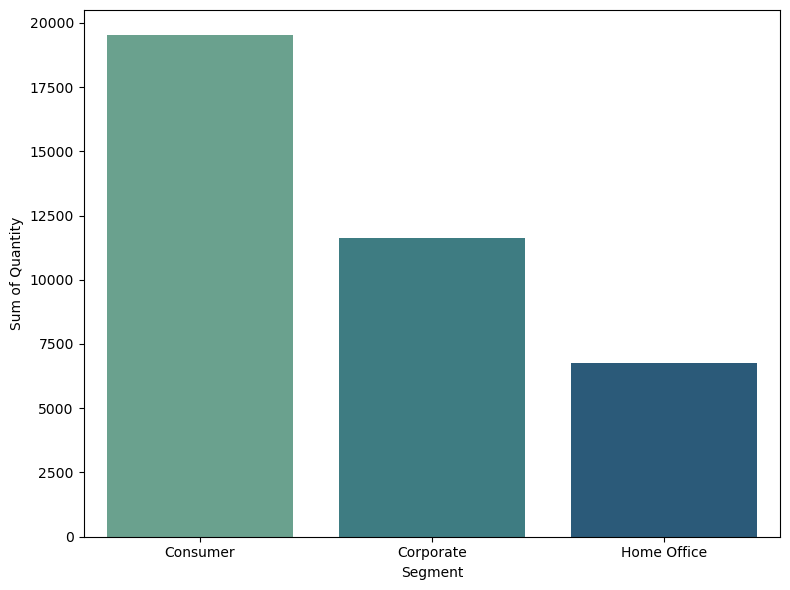

In [25]:
quantity_2 = superstore_data.groupby("Segment")["Quantity"].sum().to_frame().reset_index()
plt.figure(figsize = (8,6))
sns.barplot(x = quantity_2["Segment"], y = quantity_2["Quantity"], palette = "crest")
plt.xlabel("Segment")
plt.ylabel("Sum of Quantity")
plt.tight_layout()


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_20/1354407682.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout();


<Figure size 800x600 with 0 Axes>

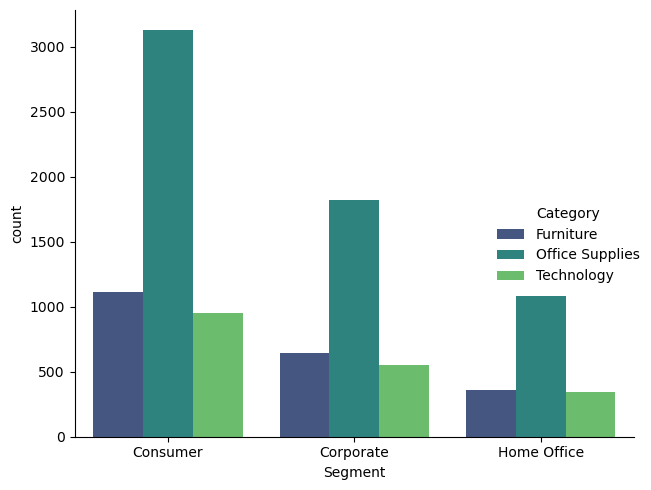

In [26]:
plt.figure(figsize = (8,6))
sns.catplot(data = superstore_data, x = "Segment", hue = "Category", kind = "count", palette = "viridis")
#sns.color_palette("YlOrBr", as_cmap=True)
plt.tight_layout();

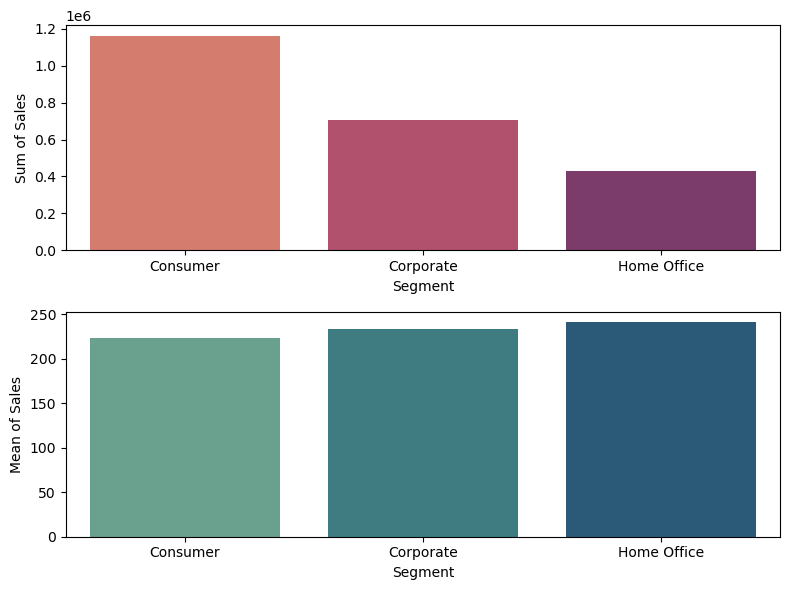

In [27]:
segment_df = superstore_data.groupby("Segment")[["Sales","Profit"]].agg(["sum", "mean"]).reset_index()
fig,ax = plt.subplots(2, figsize = (8,6))
ax1 = sns.barplot(x= segment_df["Segment"], y = segment_df["Sales"]["sum"], ax=ax[0], palette = "flare")
ax1.set_ylabel("Sum of Sales")
ax2 = sns.barplot(x = segment_df["Segment"], y = segment_df["Sales"]["mean"], ax=ax[1], palette = "crest")
ax2.set_ylabel("Mean of Sales")
plt.tight_layout();

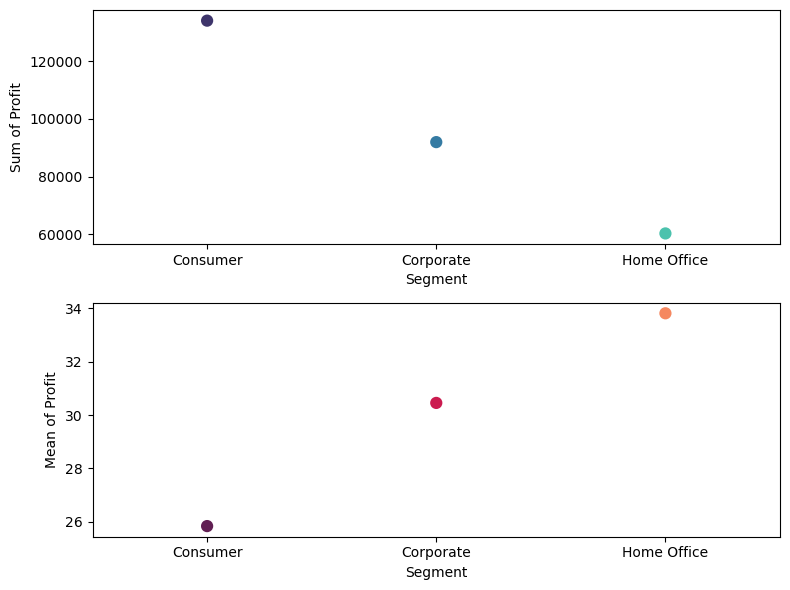

In [28]:
fig, ax = plt.subplots(2, figsize = (8,6))
ax1 = sns.pointplot(x = segment_df["Segment"], y= segment_df["Profit"]["sum"], ax=ax[0],palette = "mako")
ax1.set_ylabel("Sum of Profit")
ax2 = sns.pointplot(x = segment_df["Segment"], y = segment_df["Profit"]["mean"], ax=ax[1],palette = "rocket")
ax2.set_ylabel("Mean of Profit")
plt.tight_layout();

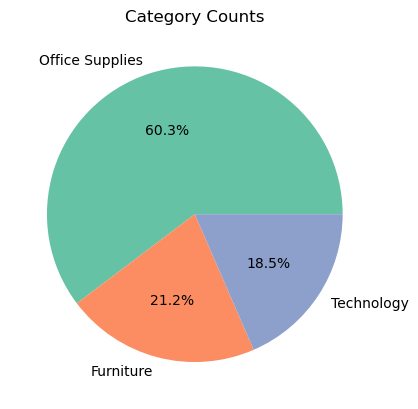

In [29]:
#category visualizations
category = dict(superstore_data["Category"].value_counts())
palette_color = sns.color_palette("Set2")
plt.pie(category.values(), labels = category.keys(), autopct="%1.1f%%", colors = palette_color)
plt.title("Category Counts")
plt.show();

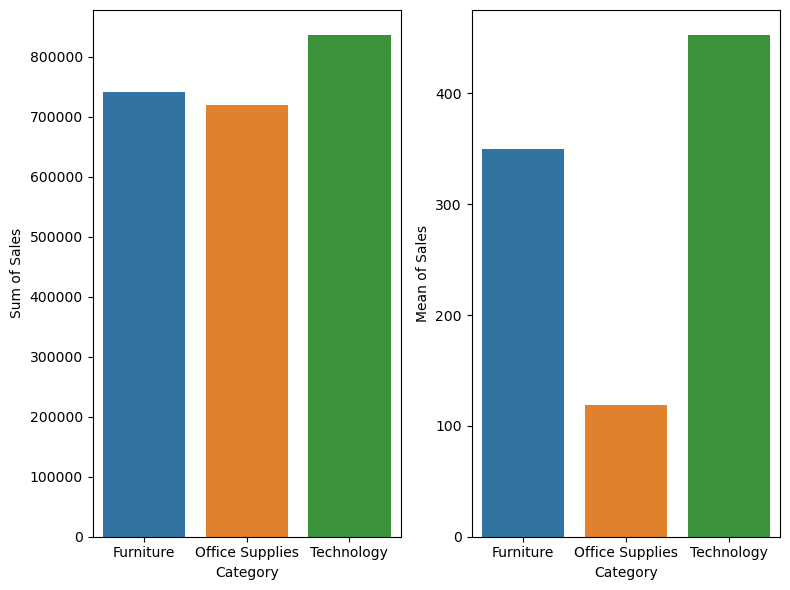

In [30]:
#category visualizations
category = superstore_data.groupby("Category")[["Sales","Profit"]].agg(["sum", "mean"]).reset_index()
fig,ax = plt.subplots(1,2, figsize = (8,6))
ax1 = sns.barplot(x= category["Category"], y = category["Sales"]["sum"], ax=ax[0])
ax1.set_ylabel("Sum of Sales")
ax2 = sns.barplot(x = category["Category"], y = category["Sales"]["mean"], ax=ax[1])
ax2.set_ylabel("Mean of Sales")
plt.tight_layout();

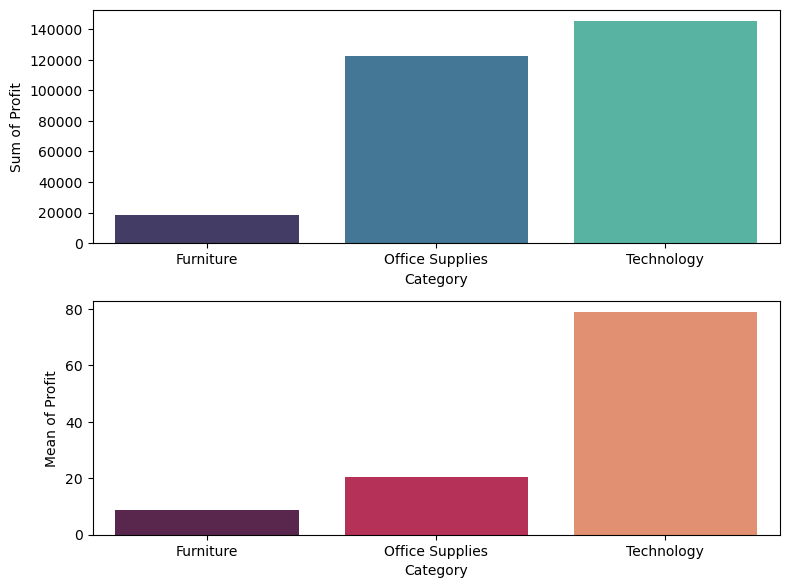

In [31]:
fig, ax = plt.subplots(2, figsize = (8,6))
ax1 = sns.barplot(x = category["Category"], y= category["Profit"]["sum"], ax=ax[0],palette = "mako")
ax1.set_ylabel("Sum of Profit")
ax2 = sns.barplot(x = category["Category"], y = category["Profit"]["mean"], ax=ax[1],palette = "rocket")
ax2.set_ylabel("Mean of Profit")
plt.tight_layout();

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_20/1221900189.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout();


<Figure size 800x600 with 0 Axes>

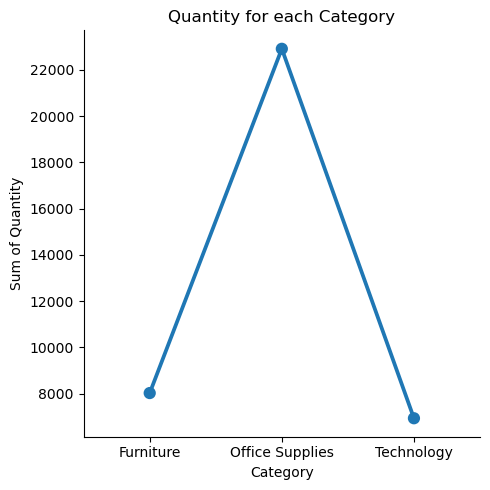

In [32]:
quantity = superstore_data.groupby("Category")["Quantity"].sum().to_frame().reset_index()
plt.figure(figsize = (8,6))
sns.catplot(data = quantity, x = "Category", y = "Quantity", kind ="point")
plt.ylabel("Sum of Quantity")
plt.xlabel("Category")
plt.title("Quantity for each Category")
plt.tight_layout();

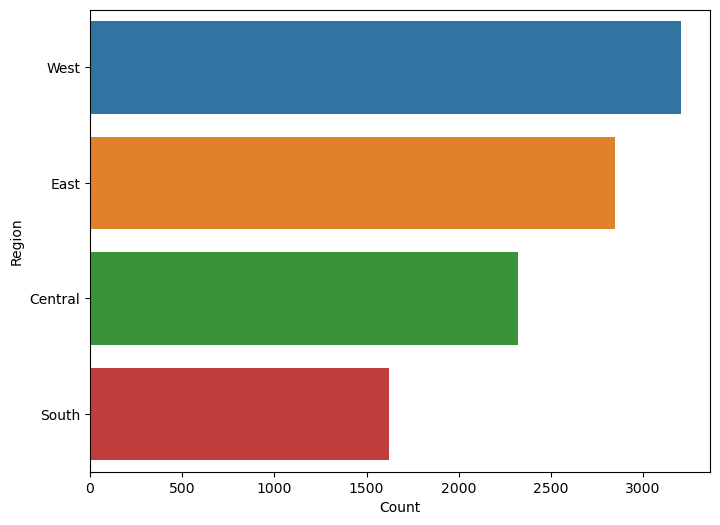

In [33]:
#region visualizations
region = superstore_data["Region"].value_counts().to_frame().reset_index()
plt.figure(figsize = (8,6))
sns.barplot(x = region["Region"], y = region["index"])
#sns.catplot(data=region, x="index", y="Region", kind="swarm")
plt.ylabel("Region")
plt.xlabel("Count");
#plt.title("State Count");

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_20/2220038879.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout();


<Figure size 800x600 with 0 Axes>

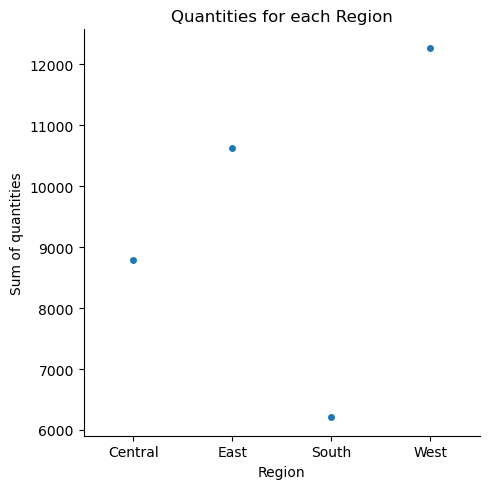

In [34]:
quantity = superstore_data.groupby("Region")["Quantity"].sum().to_frame().reset_index()
plt.figure(figsize = (8,6))
sns.catplot(data = quantity, x = "Region", y = "Quantity")
plt.ylabel("Sum of quantities")
plt.title("Quantities for each Region")
plt.tight_layout();

In [35]:
#plt.figure(figsize = (8,6))
region_profit = px.scatter(superstore_data, x='Region', y='Profit', title='Distribution of Profit by Region',
                           labels={'Profit': 'Profit'}, template='plotly')
region_profit.update_xaxes(title_text='Region')
region_profit.show();

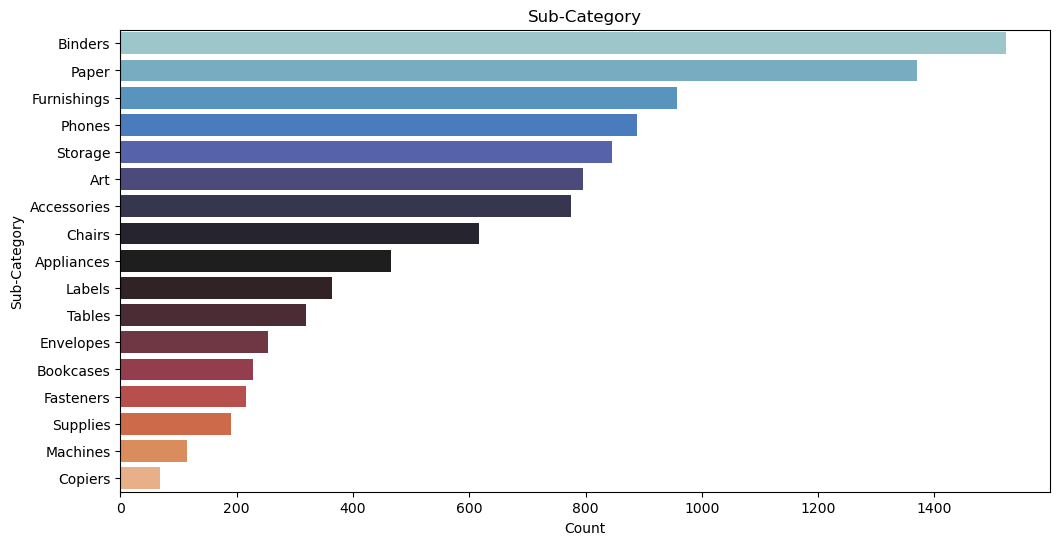

In [36]:
#visualizing subcategory
sub = superstore_data["Sub-Category"].value_counts().to_frame().reset_index()
plt.figure(figsize = (12,6))
sns.barplot(y = sub["index"], x = sub["Sub-Category"], palette = "icefire")
plt.ylabel("Sub-Category")
plt.xlabel("Count")
plt.title("Sub-Category");

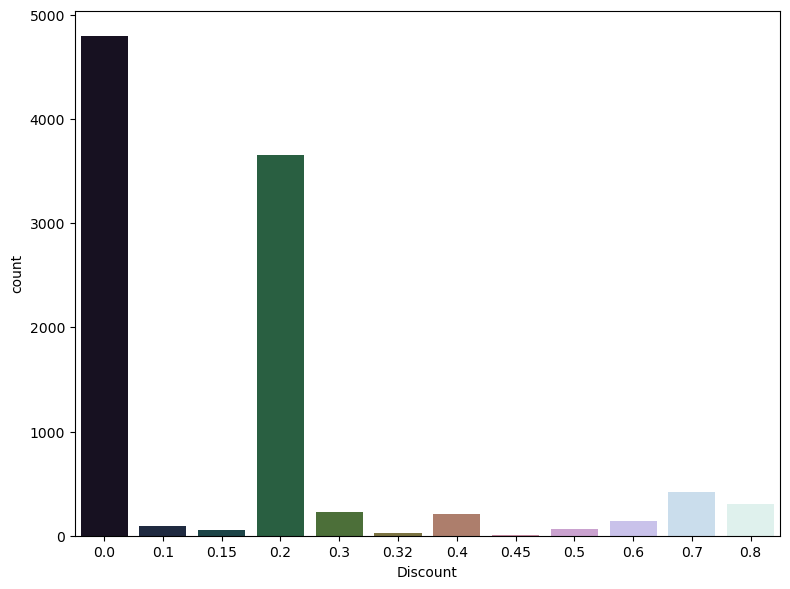

In [37]:
#visualizing discount
plt.figure(figsize = (8,6))
sns.countplot(x = superstore_data["Discount"], palette =  "cubehelix")
plt.tight_layout();

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight

/tmp/ipykernel_20/322560755.py:4: UserWarning:

The figure layout has changed to tight



<Figure size 800x600 with 0 Axes>

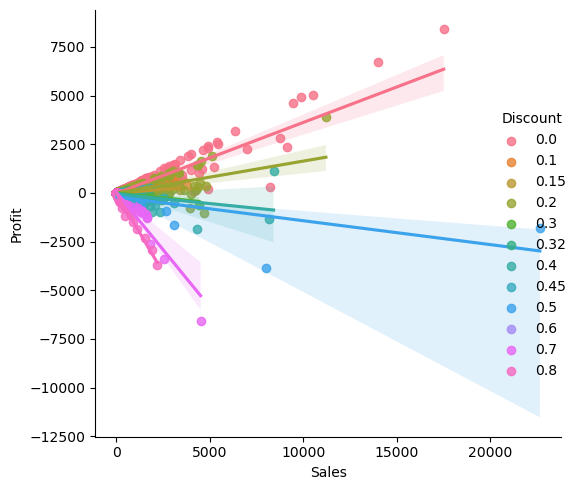

In [38]:
#relationship between sales,profit and discount
plt.figure(figsize = (8,6))
sns.lmplot(x = "Sales", y = "Profit",hue = "Discount", data = superstore_data)
plt.tight_layout();

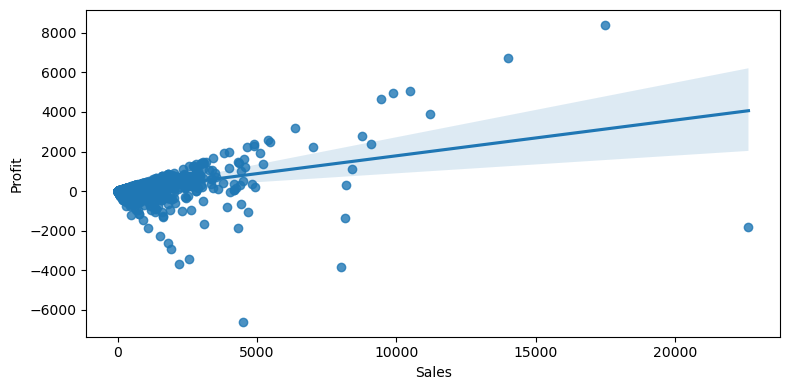

In [39]:
#relationship between sales and profit 
plt.figure(figsize = (8,4))
sns.regplot(x = "Sales", y = "Profit", data = superstore_data)
plt.tight_layout();

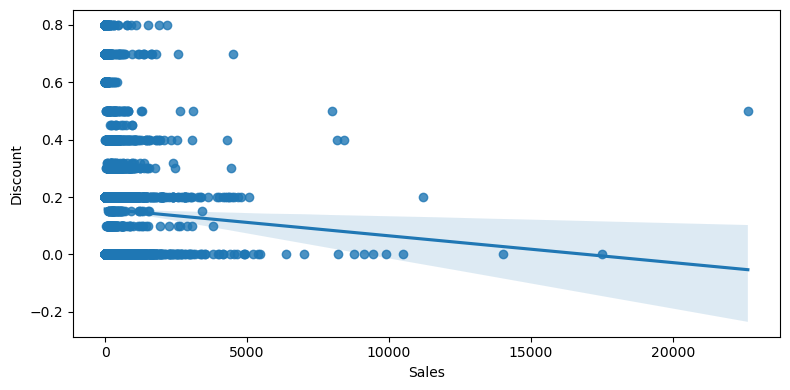

In [40]:
#relationship between sales and discount
plt.figure(figsize = (8,4))
sns.regplot(x = "Sales", y = "Discount", data = superstore_data)
plt.tight_layout();

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight

/tmp/ipykernel_20/4228072478.py:4: UserWarning:

The figure layout has changed to tight



<Figure size 800x600 with 0 Axes>

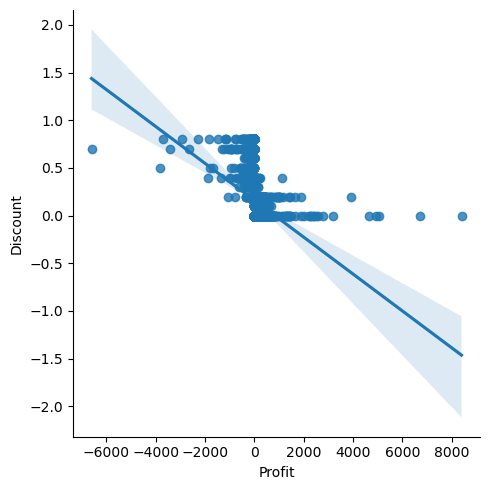

In [41]:
#relationship between profit and discount
plt.figure(figsize = (8,6))
sns.lmplot(x = "Profit", y = "Discount", data = superstore_data)
plt.tight_layout();

# ****Prepping Data for MLM****

In [42]:
#finding the deivery time in terms
diff_date = superstore_data["Ship Date"] - superstore_data["Order Date"]
superstore_data["Delivery time (Days)"] = abs(diff_date  / np.timedelta64(1, 'D')) #to get the difference in days
#dropping unnecessary columns
superstore_data.drop(["Order Date","Ship Date"],axis=1,inplace=True)
superstore_data.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Delivery time (Days)
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,91.0
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,91.0
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,4.0
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,23.0
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,23.0


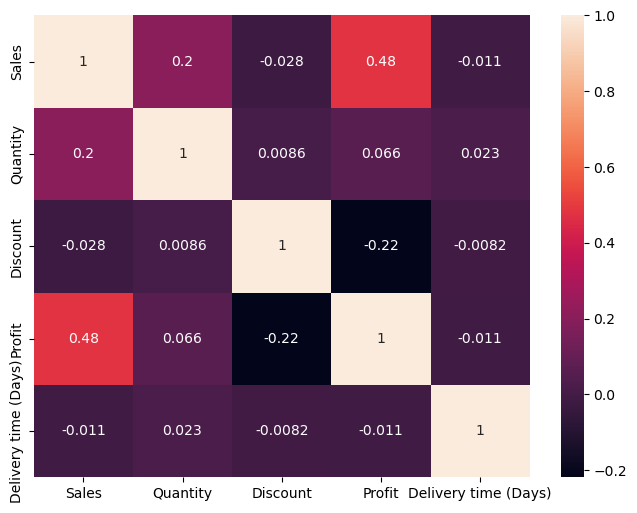

In [43]:
#correlation map
plt.figure(figsize = (8,6))
corrmatrix = superstore_data.corr(numeric_only = True)
sns.heatmap(corrmatrix, annot = True)
plt.show();